In [75]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import math

In [2]:
px=20
x_width=420
y_height=420
vision_distance_x=2
vision_distance_y=2
direction="up"

In [3]:
snake_grid=np.zeros((int(y_height/px+1), int(x_width/px+1)))


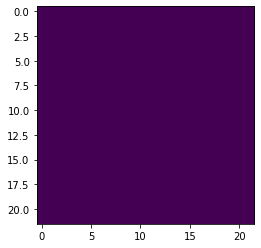

In [4]:
plt.imshow(snake_grid)

In [5]:
# point=[20,0]


In [6]:
def make_dot(input_list,grid,px,value=1):
    """
    The first number in the list (of a point) is considered the X coordinate. For numpy matricies, 
    the first number is the row index, which corresponds to "Y". For this function, we will continue to use the 
    convention of (X,Y)
    """
    
    # test if it is a list containing multiple points to plot
    if any(isinstance(i, list) for i in input_list):
        for i in range(0,len(input_list)):
            snake_grid[int(input_list[i][1]/px),int(input_list[i][0]/px)]=value
        return snake_grid
        
    #else it is only a single point:
    else:
        snake_grid[int(input_list[1]/px),int(input_list[0]/px)]=value
        return snake_grid

# make_dot(point,snake_grid);
# make_dot(lists,snake_grid);

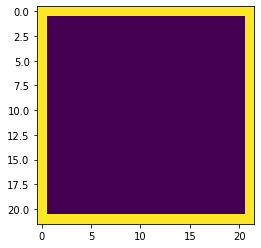

In [7]:
border=[]
for i in range(0,int(y_height/px+1)):
    border.append([0,i*px])
    border.append([int(x_width+1),i*px])
    border.append([i*px,0])
    border.append([i*px,int(y_height+1)])
make_dot(border,snake_grid,px);
plt.imshow(snake_grid)

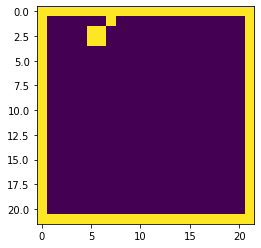

In [8]:
snake_position=[[100,40],[100,60],[120,60],[120,40],[140,20]]
make_dot(snake_position,snake_grid,px);
plt.imshow(snake_grid)

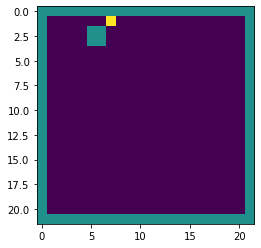

In [9]:
make_dot(snake_position[-1],snake_grid,px,2);
plt.imshow(snake_grid)

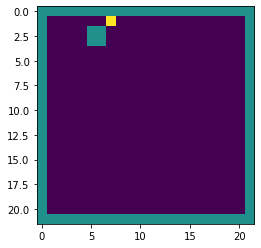

In [10]:
if direction=="right":
    rotated_snake_grid=np.rot90(snake_grid,1)
    plt.imshow(rotated_snake_grid)
if direction=="down":
    rotated_snake_grid=np.rot90(snake_grid,2)
    plt.imshow(rotated_snake_grid)
if direction=="left":
    rotated_snake_grid=np.rot90(snake_grid,3)
    plt.imshow(rotated_snake_grid)
if direction=="up":
    rotated_snake_grid=snake_grid
    plt.imshow(rotated_snake_grid)

In [11]:
# sample=snake_grid[int(100/px):int(160/px),int(100/px):int(160/px)]
# plt.imshow(sample)

In [25]:
max_vision=max(vision_distance_x,vision_distance_x)
rotated_snake_grid=np.pad(rotated_snake_grid, (max_vision, max_vision), 'constant', constant_values=(1, 1))


In [26]:
# again, note the difference between X,Y and row,col. The slices have the buffer + 1 at the end, as numpy indexing is not inclusive.
spx_rotated=np.where(rotated_snake_grid == 2)[1][0]*px
spy_rotated=np.where(rotated_snake_grid == 2)[0][0]*px

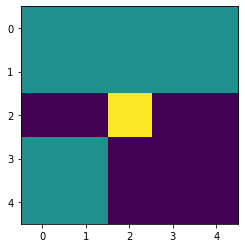

In [28]:
# again, note the difference between X,Y and row,col. The slices have the buffer + 1 at the end, as numpy indexing is not inclusive.
vision=rotated_snake_grid[int(spy_rotated/px-vision_distance_y):int(spy_rotated/px+vision_distance_y+1),int(spx_rotated/px-vision_distance_x):int(spx_rotated/px+vision_distance_x+1)]
plt.imshow(vision)

In [30]:
danger_left=vision[1,0]==1.0
print(danger_left)
danger_right=vision[1,2]==1.0
danger_straight=vision[0,1]==1.0

True


In [31]:
vision

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [0., 0., 2., 0., 0.],
       [1., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0.]])

In [70]:
ceil(vision.shape[0]/2.0)

NameError: name 'ceil' is not defined

In [77]:
math.ceil(/2)

3

In [106]:
state=[]

In [107]:
for i in range(0,vision.shape[0]):
    for j in range(0,vision.shape[1]):
        if i==math.floor(vision.shape[0]/2) and j==math.floor(vision.shape[1]/2):
            print(i,j)
            continue
        state.append(vision[i,j]==1.0)

2 2


In [95]:
vision

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [0., 0., 2., 0., 0.],
       [1., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0.]])

In [96]:
state=[]

In [62]:
vision[0,0]

1.0

In [110]:
print(state)

[True, True, True, True, True, True, True, True, True, True, False, False, False, False, True, True, False, False, False, True, True, False, False, False, True, False]


In [108]:
other_features=[True,False]

In [109]:
for i in range(0,len(other_features)):
    state.append(other_features[i])